Notebook to inspect the avaiblable datasets.

# Datasets with lesions

In [3]:
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

folders = ["/home/benet/data/generation2D_VH/train/flair",
            "/home/benet/data/lesion2D_VH/train/flair",
            "/home/benet/data/generation2D_SHIFTS/train/flair",
            "/home/benet/data/lesion2D_SHIFTS/train/flair",
            "/home/benet/data/generation2D_WMH2017/train/flair",
            "/home/benet/data/lesion2D_WMH2017/train/flair"]

dataset_names = ["generation2D_VH", "lesion2D_VH", "generation2D_SHIFTS", "lesion2D_SHIFTS", "generation2D_WMH2017", "lesion2D_WMH2017"]

# read all the images in the folder and do an histogram
def read_images(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            image = Image.open(image_path).convert("L")  # Convert to grayscale 
            images.append(image)
    return images

def plot_histogram(images, dataset_name):
    # Flatten the images and concatenate them into a single array
    all_pixels = np.concatenate([np.array(image).flatten() for image in images])
    # print the min and max values
    print(f"Min pixel value: {np.min(all_pixels)}")
    print(f"Max pixel value: {np.max(all_pixels)}")

    # remove the black (background) pixels (pixels = min)
    all_pixels = all_pixels[all_pixels > 0]
    
    # Create histogram
    plt.figure(figsize=(10, 5))
    plt.hist(all_pixels, bins=128, range=(0, 255), color='blue', alpha=0.7)
    plt.ylim(0, 880000)
    plt.title(f"Histogram of Pixel Intensities - {dataset_name}")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

    if not os.path.exists("./histograms"):
        os.makedirs("./histograms")
    histogram_path = os.path.join("./histograms", f"{dataset_name}_histogram.png")
    plt.savefig(histogram_path)

Reading images from folder: /home/benet/data/generation2D_VH/train/flair
Min pixel value: 0
Max pixel value: 255


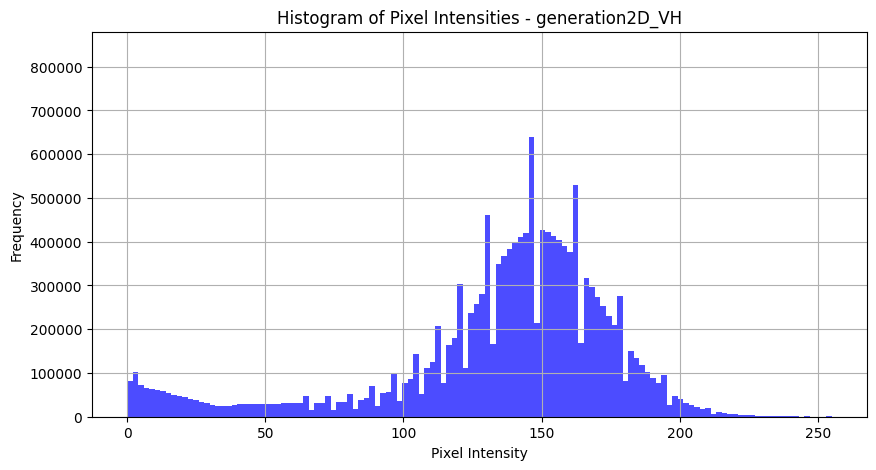

Reading images from folder: /home/benet/data/lesion2D_VH/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

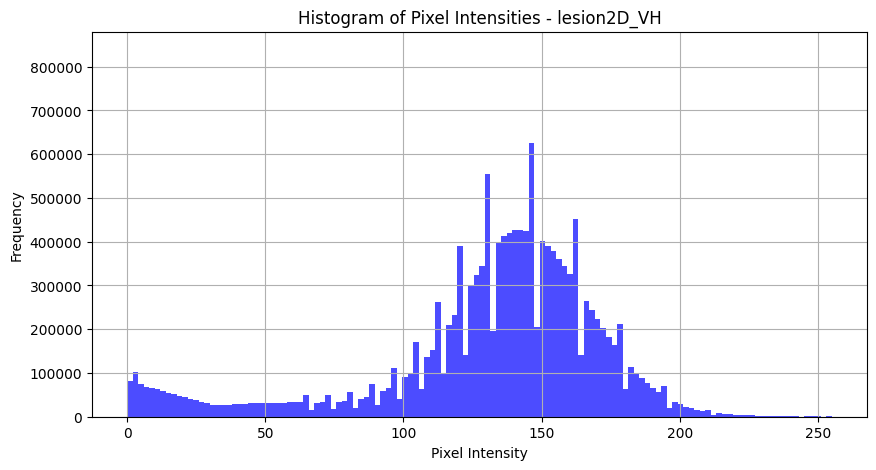

Reading images from folder: /home/benet/data/generation2D_SHIFTS/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

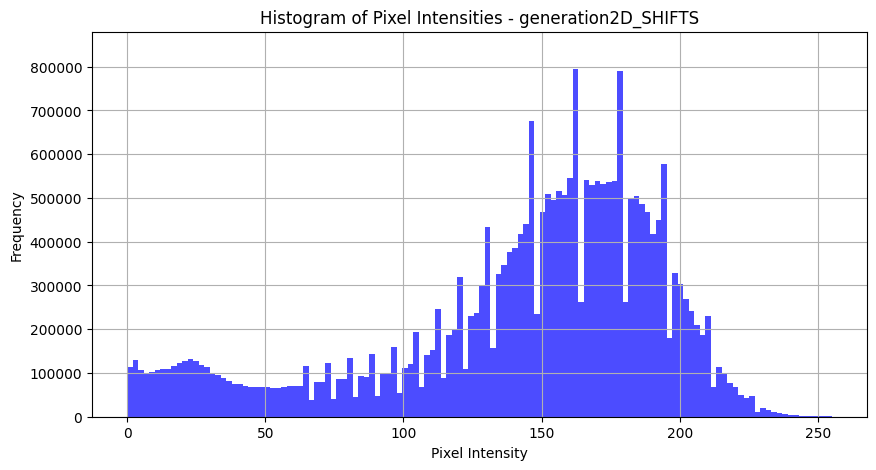

Reading images from folder: /home/benet/data/lesion2D_SHIFTS/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

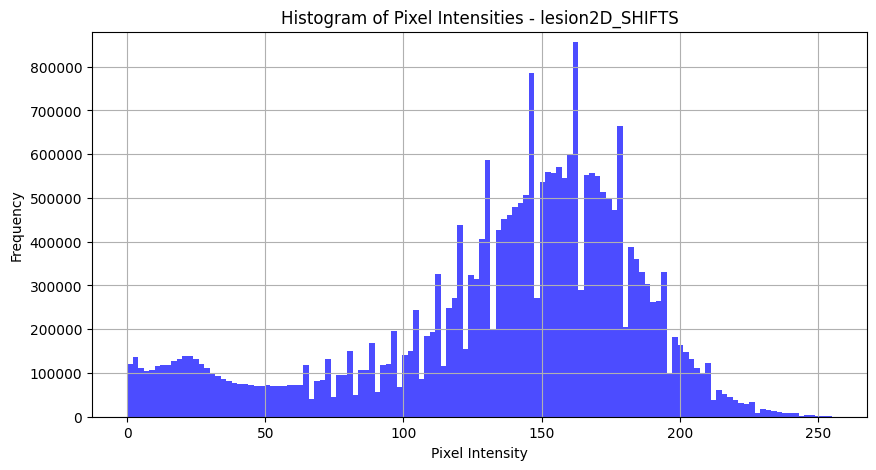

Reading images from folder: /home/benet/data/generation2D_WMH2017/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

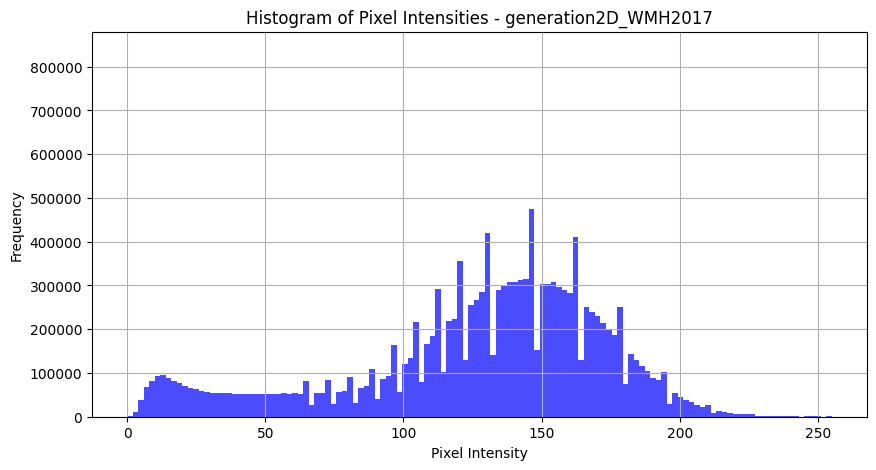

Reading images from folder: /home/benet/data/lesion2D_WMH2017/train/flair
Min pixel value: 0
Max pixel value: 255


<Figure size 640x480 with 0 Axes>

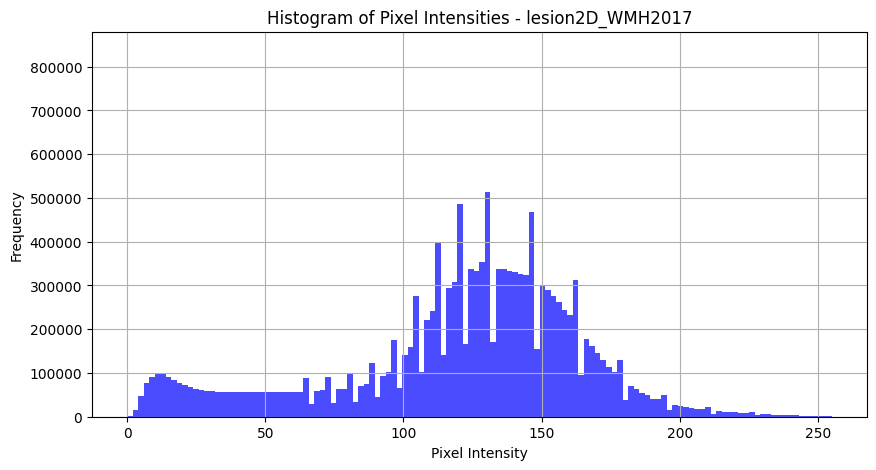

<Figure size 640x480 with 0 Axes>

In [4]:
for folder in folders:
    print(f"Reading images from folder: {folder}")
    # Check if the folder exists
    if not os.path.exists(folder):
        print(f"Folder '{folder}' does not exist.")
        sys.exit(1)

    # Read images from the folder
    images = read_images(folder)

    # Check if any images were found
    if len(images) == 0:
        print(f"No images found in folder '{folder}'.")
        sys.exit(1)

    # Plot histogram of pixel intensities
    plot_histogram(images, dataset_names[folders.index(folder)])

# By scanner

In [5]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

def get_scanner_from_filename(filename):
    parts = filename.split("_")
    if parts[0] == "WMH2017":
        idx = int(parts[1])
        if idx < 50:
            return "Philips"
        elif idx < 70:
            return "Siemens"
        elif idx < 145:
            return "GE"
        else:
            return None
    if "ISI" in filename:
        return "GE"
    if "TSI" in filename:
        return "Philips"
    if "VSI" in filename:
        return "Siemens"
    return None

def read_images_by_scanner(folder):
    scanner_dict = defaultdict(list)
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            scanner = get_scanner_from_filename(filename)
            if scanner is not None:
                image_path = os.path.join(folder, filename)
                image = Image.open(image_path).convert("L")
                scanner_dict[scanner].append(image)
    return scanner_dict

def plot_histogram(images, scanner_name, output_dir):
    all_pixels = np.concatenate([np.array(img).flatten() for img in images])
    print(f"[{scanner_name}] Min: {np.min(all_pixels)} Max: {np.max(all_pixels)}")
    
    all_pixels = all_pixels[all_pixels > 0]

    plt.figure(figsize=(10, 5))
    plt.hist(all_pixels, bins=128, range=(0, 255), color='blue', alpha=0.7)
    plt.title(f"Histogram of Pixel Intensities - {scanner_name}")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid()

    os.makedirs(output_dir, exist_ok=True)
    out_path = os.path.join(output_dir, f"{scanner_name}_histogram.png")
    plt.savefig(out_path)
    plt.show()

def generate_scanner_histograms(input_folder):
    if not os.path.exists(input_folder):
        print(f"Folder '{input_folder}' does not exist.")
        return
    
    print(f"\n📂 Processing folder: {input_folder}")
    scanner_images = read_images_by_scanner(input_folder)
    all_images_combined = []

    # Use the last part of the path (train/test) to distinguish output
    output_dir = os.path.join("./histograms_by_scanner", os.path.basename(os.path.dirname(input_folder)))

    for scanner, images in scanner_images.items():
        if len(images) == 0:
            print(f"No images found for scanner: {scanner}")
            continue
        plot_histogram(images, scanner, output_dir)
        all_images_combined.extend(images)

    if len(all_images_combined) > 0:
        plot_histogram(all_images_combined, "All_Scanners", output_dir)



📂 Processing folder: /home/benet/data/WMH2017_split/train/flair
[GE] Min: 0 Max: 255


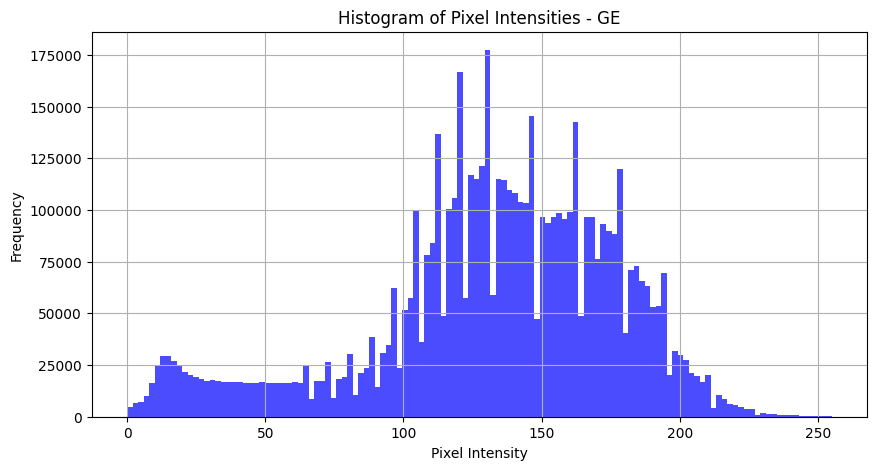

[Siemens] Min: 0 Max: 255


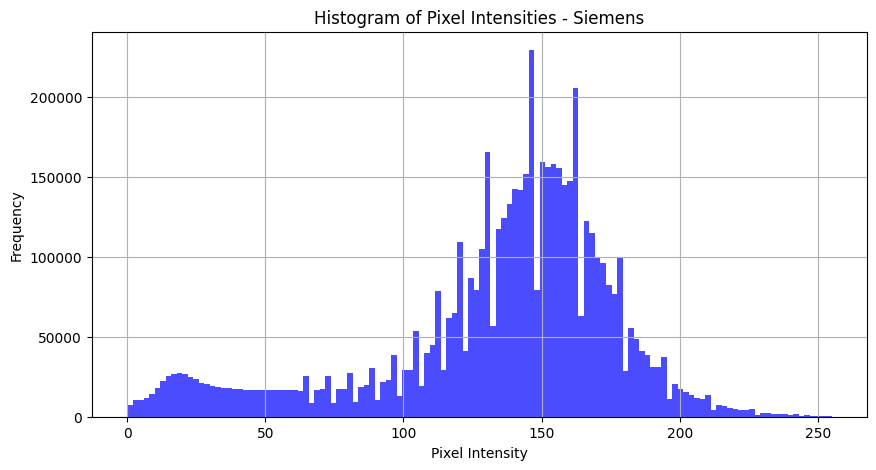

[Philips] Min: 0 Max: 255


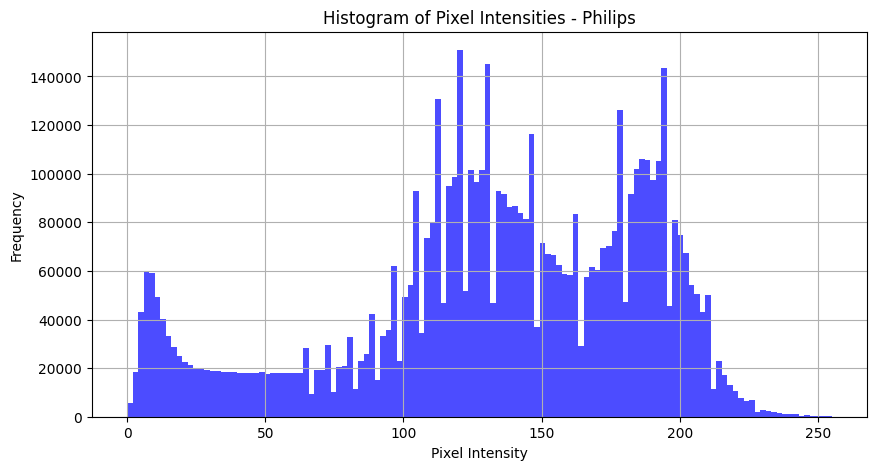

[All_Scanners] Min: 0 Max: 255


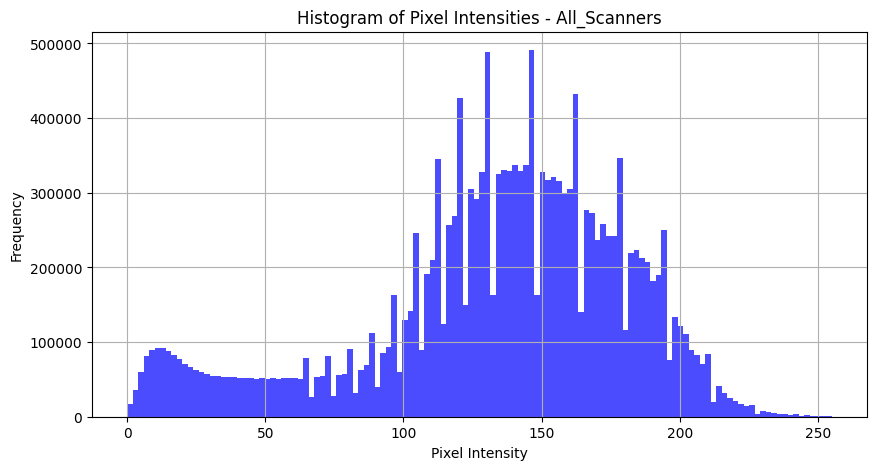


📂 Processing folder: /home/benet/data/WMH2017_split/test/flair
[GE] Min: 0 Max: 255


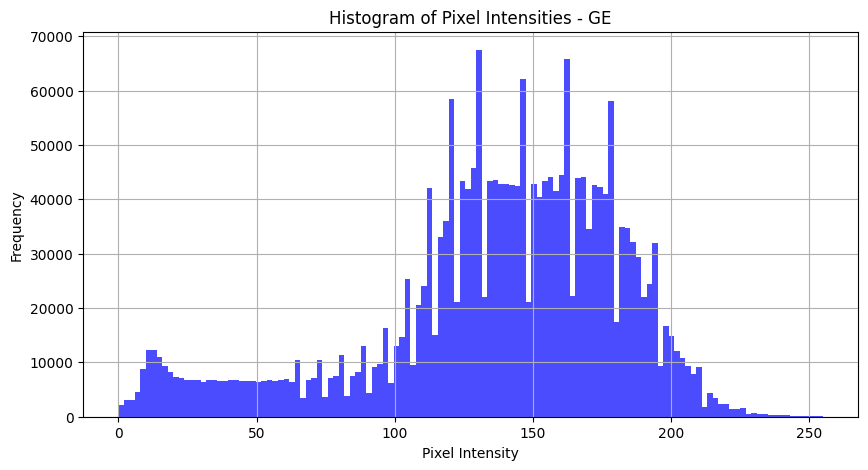

[Philips] Min: 0 Max: 255


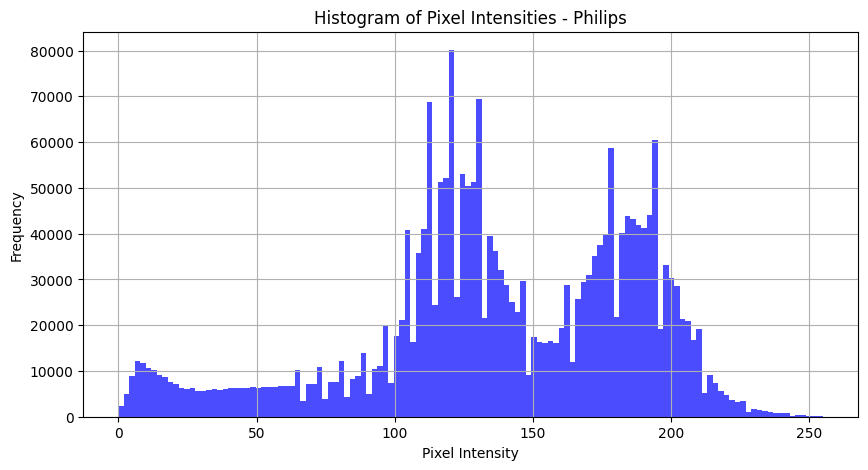

[Siemens] Min: 0 Max: 255


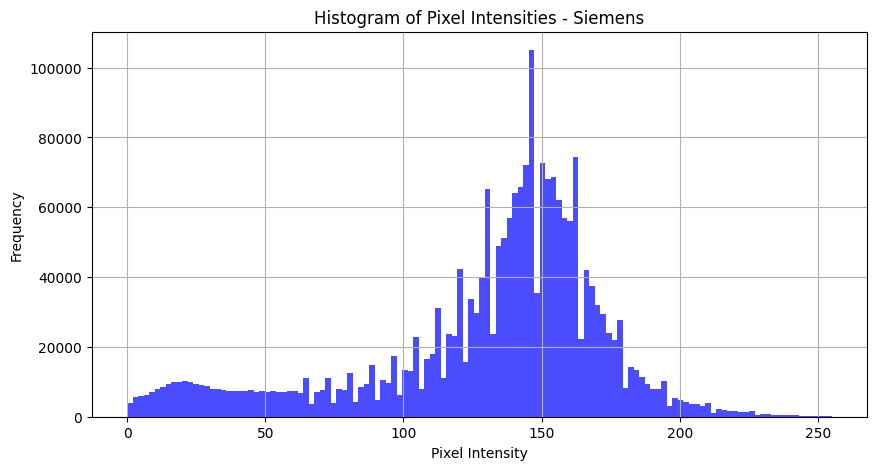

[All_Scanners] Min: 0 Max: 255


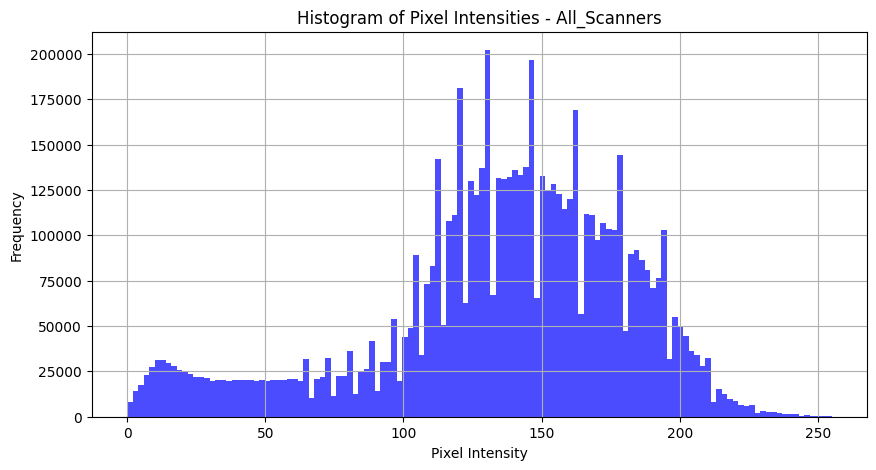

In [6]:
generate_scanner_histograms("/home/benet/data/WMH2017_split/train/flair")
generate_scanner_histograms("/home/benet/data/WMH2017_split/test/flair")


[WMH2017_GE] Num images: 195 | Min: 1 Max: 255


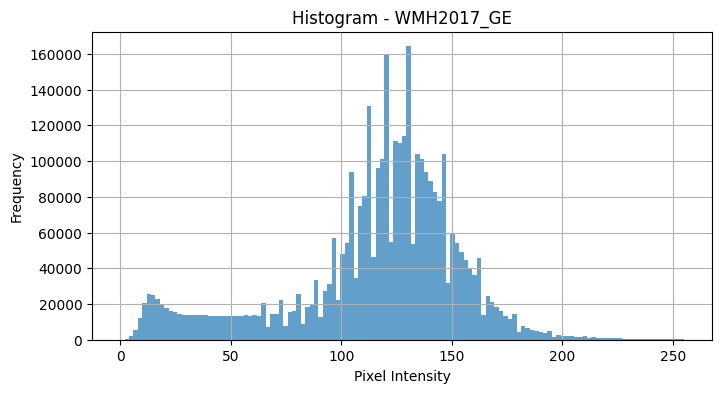

[VSI_Siemens] Num images: 50 | Min: 1 Max: 255


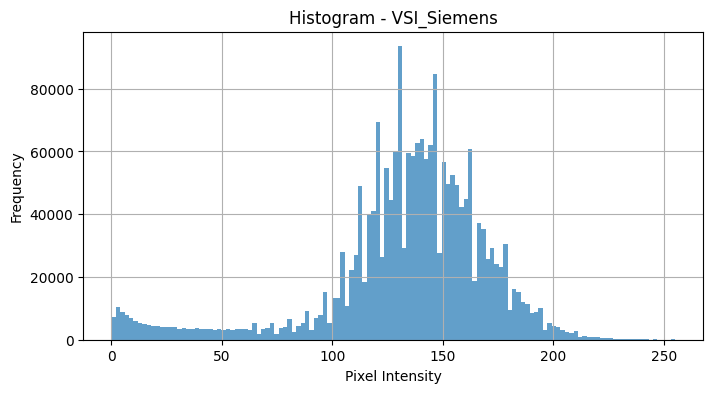

[WMH2017_Siemens] Num images: 195 | Min: 1 Max: 255


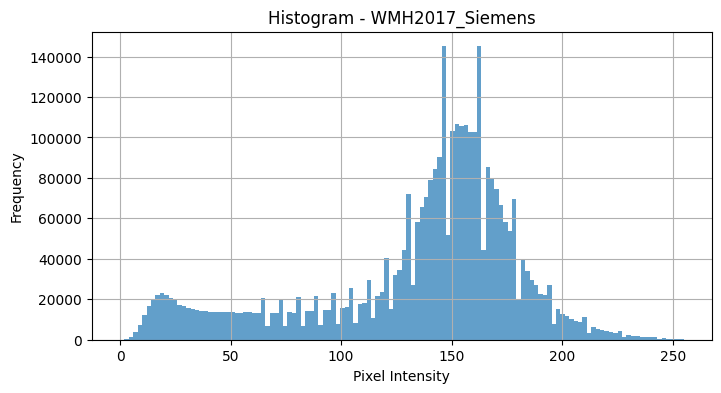

[ISI_GE] Num images: 50 | Min: 1 Max: 255


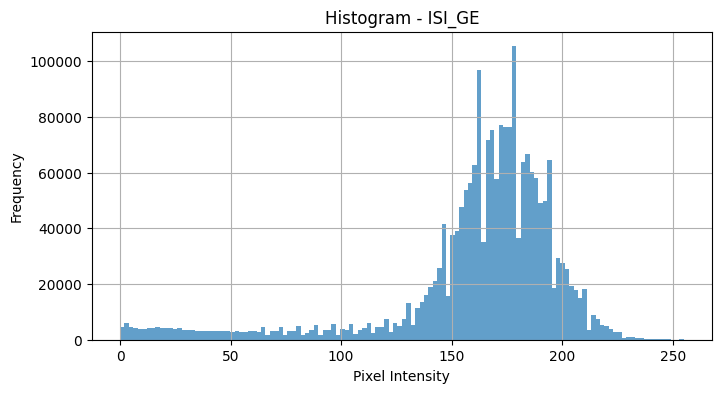

[WMH2017_Philips] Num images: 195 | Min: 1 Max: 255


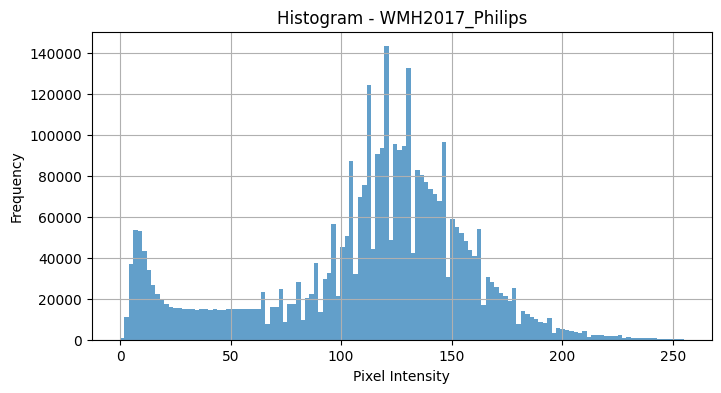

[TSI_Philips] Num images: 50 | Min: 1 Max: 255


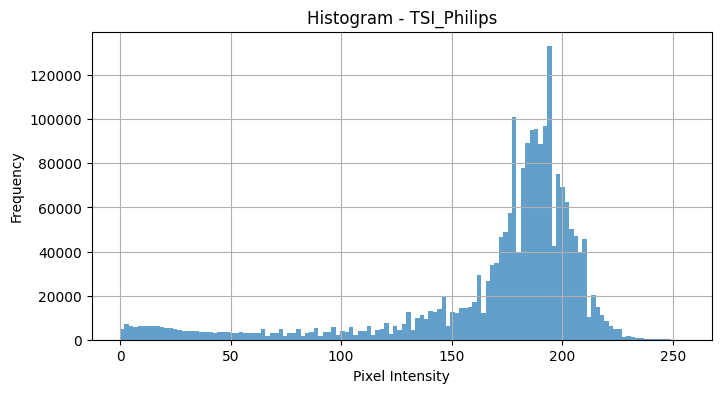

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

def get_scanner_from_filename(filename):
    parts = filename.split("_")
    if parts[0] == "WMH2017":
        idx = int(parts[1])
        if idx < 50:
            return "Philips"
        elif idx < 70:
            return "Siemens"
        elif idx < 145:
            return "GE"
        else:
            return None
    if "ISI" in filename:
        return "GE"
    if "TSI" in filename:
        return "Philips"
    if "VSI" in filename:
        return "Siemens"
    return None

def read_example_images(folder, sample_filters):
    scanner_dict = defaultdict(list)
    for filename in os.listdir(folder):
        if not filename.endswith(".png"):
            continue
        # Apply filters
        for label, filter_fn in sample_filters.items():
            if filter_fn(filename):
                path = os.path.join(folder, filename)
                image = Image.open(path).convert("L")
                scanner_dict[label].append(image)
                break  # Don't count the same image twice
    return scanner_dict

def plot_histogram(images, label, output_dir="./histograms_sample"):
    pixels = np.concatenate([np.array(img).flatten() for img in images])
    pixels = pixels[pixels > 0]  # remove black
    print(f"[{label}] Num images: {len(images)} | Min: {np.min(pixels)} Max: {np.max(pixels)}")

    plt.figure(figsize=(8, 4))
    plt.hist(pixels, bins=128, range=(0, 255), alpha=0.7)
    plt.title(f"Histogram - {label}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()

    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(os.path.join(output_dir, f"{label}_hist.png"))
    plt.show()

def generate_sample_histograms(input_folder):
    sample_filters = {
        "WMH2017_Philips": lambda f: f.startswith("WMH2017_") and int(f.split("_")[1]) < 50,
        "TSI_Philips": lambda f: "TSI" in f,
        "WMH2017_GE": lambda f: f.startswith("WMH2017_") and 100 <= int(f.split("_")[1]) < 145,
        "ISI_GE": lambda f: "ISI" in f,
        "WMH2017_Siemens": lambda f: f.startswith("WMH2017_") and 50 <= int(f.split("_")[1]) < 70,
        "VSI_Siemens": lambda f: "VSI" in f,
    }

    image_sets = read_example_images(input_folder, sample_filters)
    for label, images in image_sets.items():
        if len(images) == 0:
            print(f"[{label}] No images found.")
            continue
        plot_histogram(images, label)

# Example usage:
generate_sample_histograms("/home/benet/data/WMH2017_split/train/flair")


# Amout of lesion load per dataset

In [1]:
import os
import sys
import numpy as np
from PIL import Image

# Adjusted folders: switch 'flair' to 'mask'
folders = [
    "/home/benet/data/generation2D_VH/train/mask",
    "/home/benet/data/lesion2D_VH/train/mask",
    "/home/benet/data/generation2D_SHIFTS/train/mask",
    "/home/benet/data/lesion2D_SHIFTS/train/mask",
    "/home/benet/data/generation2D_WMH2017/train/mask",
    "/home/benet/data/lesion2D_WMH2017/train/mask"
]

dataset_names = [
    "generation2D_VH", "lesion2D_VH",
    "generation2D_SHIFTS", "lesion2D_SHIFTS",
    "generation2D_WMH2017", "lesion2D_WMH2017"
]

def compute_lesion_load(folder):
    lesion_loads = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            mask = np.array(Image.open(image_path).convert("L"))
            
            # Assumes lesion is encoded as white (255)
            lesion_area = np.sum(mask == 255)
            total_area = mask.size
            
            lesion_percent = (lesion_area / total_area) * 100
            lesion_loads.append(lesion_percent)
    
    return np.array(lesion_loads)

# Loop over datasets and compute
for folder, dataset_name in zip(folders, dataset_names):
    print(f"Processing {dataset_name} ...")
    if not os.path.exists(folder):
        print(f"Folder '{folder}' does not exist.")
        continue

    lesion_loads = compute_lesion_load(folder)
    
    avg_load = np.mean(lesion_loads)
    std_load = np.std(lesion_loads)
    
    print(f"{dataset_name} --> Lesion load: {avg_load:.4f}% ± {std_load:.4f}%  (n={len(lesion_loads)} images)")


Processing generation2D_VH ...
generation2D_VH --> Lesion load: 0.1922% ± 0.2899%  (n=741 images)
Processing lesion2D_VH ...
lesion2D_VH --> Lesion load: 0.1922% ± 0.2899%  (n=741 images)
Processing generation2D_SHIFTS ...
generation2D_SHIFTS --> Lesion load: 1.0621% ± 1.2526%  (n=1274 images)
Processing lesion2D_SHIFTS ...
lesion2D_SHIFTS --> Lesion load: 1.0621% ± 1.2526%  (n=1274 images)
Processing generation2D_WMH2017 ...
generation2D_WMH2017 --> Lesion load: 0.9887% ± 1.1284%  (n=780 images)
Processing lesion2D_WMH2017 ...
lesion2D_WMH2017 --> Lesion load: 0.9887% ± 1.1284%  (n=780 images)
